# 简介

+ 解决二分类的问题
+ 类别分别用0和1表示

# 问题提出

1. 假设函数  
$$\hat{y}=h_{\theta}(x)=g\left(\theta^{T} x\right)=\frac{1}{1+e^{-\theta^{T} x}}$$
$$g(z)=\frac{1}{1+e^{-z}} \text { 其中 }: z = \theta^Tx  \text{（sigmoid函数）}$$
2. 损失函数
$$L(\hat{y}, y)=-y \log \hat{y}-(1-y) \log (1-\hat{y})$$
3. 代价函数
$$\begin{array}{l}
J(\theta)=\frac{1}{m} \sum_{i=1}^{m} L\left(\hat{y}^{(i)}, y^{(i)}\right) \\
=\frac{1}{m} \sum_{t=1}^{m}\left[-y^{(i)} \log \hat{y}^{(i)}-\left(1-y^{(i)}\right) \log \left(1-\hat{y}^{(i)}\right)\right] \\
=\frac{1}{m} \sum_{i=1}^{m}\left[-y^{(i)} \log \frac{1}{1+e^{-\theta^{T} x^{(i)}}}-\left(1-y^{(i)}\right) \log \left(1-\frac{1}{\left.1+e^{-\theta^{T} x^{(i)}}\right)}\right)\right]
\end{array}$$


# 逻辑回归求解
$$\begin{aligned}
&\frac{\partial}{\partial \theta_{j}} J(\theta)=\frac{\partial}{\partial \theta_{j}} \frac{1}{m} \sum_{i=1}^{m}\left[-y^{(i)} \log \frac{1}{1+e^{-\theta^{T} x^{(i)}}}-\left(1-y^{(i)}\right) \log \left(1-\frac{1}{\left.1+e^{-\theta^{T} x^{(i)}}\right)}\right]\right.\\
&=\frac{\partial}{\partial \theta_{j}} \frac{1}{m} \sum_{i=1}^{m}\left[y^{(i)} \log \left(1+e^{-\theta^{T} x^{(i)}}\right)+\left(1-y^{(i)}\right) \log \left(1+e^{\theta^{T} x^{(i)}}\right)\right]\\
&=\frac{1}{m} \sum_{i=1}^{m}\left[y^{(i)} \frac{-x_j^{(i)} e^{-\theta^{T} x^{(i)}}}{1+e^{-\theta^{T} x^{(i)}}}+\left(1-y^{(i)}\right) \frac{x_{j}^{(i)} e^{\theta^{T} x^{(i)}}}{1+e^{\theta^{T} x^{(i)}}}\right]\\
&=\frac{1}{m} \sum_{i=1}^{m}\left[y^{(i)} \frac{-x_{j}^{(i)}}{1+e^{\theta^{T} x^{(i)}}}+\left(1-y^{(i)}\right) \frac{x_{j}^{(i)} e^{\theta^{T} x^{(i)}}}{1+e^{\left.\theta^{T} x^{(i}\right)}}\right]\\
&=\frac{1}{m} \sum_{i=1}^{m}\left[\frac{-x_{j}^{(i)} y^{(i)}+x_{j}^{(i)} e^{\theta^{T} x^{(i)}}-y^{(i)} x_{j}^{(i)} e^{\theta^{T} x^{(i)}}}{1+e^{\theta^{T} x^{(i)}}}\right]\\
&=\frac{1}{m} \sum_{i=1}^{m}\left[\frac{-y^{(i)}\left(1+e^{\theta^{T} x^{(i)}}\right)+e^{\theta^{T} x^{(i)}}}{1+e^{\theta^{T} x^{(i)}}} x_{j}^{(i)}\right]=\frac{1}{m} \sum_{i=1}^{m}\left[\left(-y^{(i)}+\frac{e^{\theta^{T} x^{(i)}}}{1+e^{\theta^{j} x^{(i)}}}\right) x_{j}^{(i)}\right]\\
&=\frac{1}{m} \sum_{(i=1}^{m}\left[\left(-y^{(i)}+\frac{1}{1+e^{-\theta^{T} x^{(i)}}}\right) x_{j}^{(i)}\right]=\frac{1}{m} \sum_{i=1}^{m}\left[\left(h_{\theta}\left(x^{(i)}\right)-y^{(i)}\right) x_{j}^{(i)}\right]
\end{aligned}$$

+ 迭代公式  
$\theta_{j}:=\theta_{j}-\alpha \frac{1}{m} \sum_{i=1}^{m}\left[\left(h_{\theta}\left(x^{(i)}\right)-y^{(i)}\right) x_{j}^{(i)}\right]$  
其中：
$h_{\theta}(x)=\frac{1}{1+e^{-\theta^{T} x}}$

# 代码实现

In [1]:
from sklearn.metrics import accuracy_score

In [5]:
def loaddata():
    data = np.loadtxt('data/3_1.txt',delimiter=',')
    n = data.shape[1] - 1  # 特征数
    X = data[:, 0:n]
    y = data[:, -1].reshape(-1, 1)
    return X, y
def plot(X,y):
    pos = np.where(y==1)
    neg = np.where(y==0)
    plt.scatter(X[pos[0],0],X[pos[0],1],marker='x')
    plt.scatter(X[neg[0], 0], X[neg[0], 1], marker='o')
    plt.xlabel('Exam 1 score')
    plt.ylabel('Exam 2 score')
    plt.show()

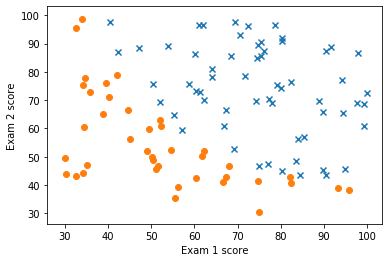

In [6]:
X,y = loaddata()
plot(X,y)

In [9]:
def sigmoide(z):
    r = 1 / (1 + np.exp(-z))
    return r
def hypothesis(X, theta):
    z = np.dot(X, theta)
    return sigmoide(z)
def computeCost(X, y, theta):
    m = X.shape[0]
    z = -1 * y * np.log(hypothesis(X,theta))-(1-y) * np.log(1-hypothesis(X,theta))
    return np.sum(z)/m

In [18]:
def gradientDescent(X,y,theta,iterations,alpha):
    #取数据条数
    m = X.shape[0]
    #在x最前面插入全1的列
    X = np.hstack((np.ones((m, 1)), X))
    for i in range(iterations):
        for j in range(len(theta)):
            theta[j] = theta[j]-(alpha/m)*np.sum((hypothesis(X,theta) - y)*X[:,j].reshape(-1,1))
        #每迭代1000次输出一次损失值
        if(i%50000==0):
            print('第',i,'次迭代，当前损失为：',computeCost(X,y,theta),'theta=',theta)
    return theta

def predict(X):
    # 在x最前面插入全1的列
    c = np.ones(X.shape[0]).transpose()
    X = np.insert(X, 0, values=c, axis=1)  
    #求解假设函数的值
    h = hypothesis(X,theta)
    #根据概率值决定最终的分类,>=0.5为1类，<0.5为0类
    h[h>=0.5]=1
    h[h<0.5]=0
    return h

In [19]:
n = X.shape[1]#特征数
theta = np.zeros(n+1).reshape(n+1, 1)  # theta是列向量,+1是因为求梯度时X前会增加一个全1列
iterations = 250000
alpha = 0.008
theta = gradientDescent(X,y,theta,iterations,alpha)
print('theta=\n',theta)

第 0 次迭代，当前损失为： 3.4898192542187316 theta= [[ 0.0008    ]
 [ 0.0959687 ]
 [-0.17080118]]
第 50000 次迭代，当前损失为： 0.9221874390429973 theta= [[-1.96095214e+01]
 [ 2.78099355e-01]
 [ 7.52595875e-03]]
第 100000 次迭代，当前损失为： 0.33992108594315495 theta= [[-24.06932143]
 [  0.1833052 ]
 [  0.23863557]]
第 150000 次迭代，当前损失为： 0.2415806458263704 theta= [[-25.40956873]
 [  0.18523859]
 [  0.23836269]]
第 200000 次迭代，当前损失为： 0.2123612218845144 theta= [[-25.68300682]
 [  0.19663504]
 [  0.21377662]]
theta=
 [[-25.7214775 ]
 [  0.21158791]
 [  0.19917776]]


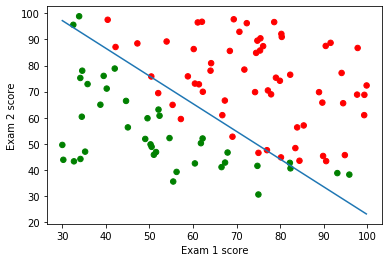

In [20]:
from matplotlib import colors
def plotDescisionBoundary(X,y,theta):
    cm_dark = colors.ListedColormap(['g', 'r'])
    plt.xlabel('Exam 1 score')
    plt.ylabel('Exam 2 score')
    plt.scatter(X[:,0],X[:,1],c=np.array(y).squeeze(),cmap=cm_dark,s=30)

    #化分类决策面 theta0+theta1*x1+theta2*x2 = 0
    # x1 = np.arange(20,110,0.1)
    x1 = np.arange(min(X[:, 0]), max(X[:, 0]), 0.1)
    x2 = -(theta[1]*x1+theta[0])/theta[2]
    plt.plot(x1,x2)
    plt.show()
plotDescisionBoundary(X,y,theta)

[分类指标](https://www.cnblogs.com/guoyaohua/p/classification-metrics.html)

In [22]:
p = predict(X)
print('准确度：',np.mean(p==y))
print('准确度：',accuracy_score(y,p))

准确度： 0.9
准确度： 0.9
